## Spam Email Detection

### Initialisation

#### Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
import wordcloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabjj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

#### Import Dataset

In [3]:
df = pd.read_csv('emails.csv')
df.columns = ['Content','Label']
df['Label'].replace(to_replace=[1,0],value=['Spam','Not Spam'],inplace=True)
df.sample(5)

C:\Users\rishabjj\AppData\Local\Temp\ipykernel_19284\3657734862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].replace(to_replace=[1,0],value=['Spam','Not Spam'],inplace=True)


,Content,Label
5029,"Subject: dr . kaminski , on wednesday , june ...",Not Spam
1052,Subject: cialis offers you the freedom of choo...,Spam
5284,Subject: meeting to discuss research support t...,Not Spam
5203,Subject: hello team we are very excited to be...,Not Spam
1283,Subject: $ 14 . 95 per year domain names affo...,Spam


#### Value Counts


In [4]:
df.value_counts().sum()

np.int64(5728)

### Data Cleaning

#### Missing Value Analysis

In [5]:
df.isnull().sum()

Content    0
Label      0
dtype: int64

#### Duplicate Removal 

In [6]:
df.duplicated().sum()

np.int64(33)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(5695, 2)

#### Dataset Description

In [8]:
df.describe()

,Content,Label
count,5695,5695
unique,5695,2
top,Subject: news : aurora 5 . 2 update aurora ve...,Not Spam
freq,1,4327


#### Shape

In [9]:
df.shape

(5695, 2)

### Exploratory Data Analysis

#### Label Distribution

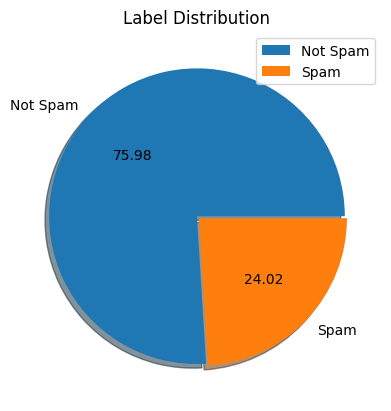

In [10]:
plt.pie(df['Label'].value_counts(),autopct="%0.2f",labels=['Not Spam','Spam'],explode=[0,0.02],shadow=True)
plt.legend(loc='best')
plt.title('Label Distribution')
plt.show()

#### Word Cloud 

##### Spam Mails

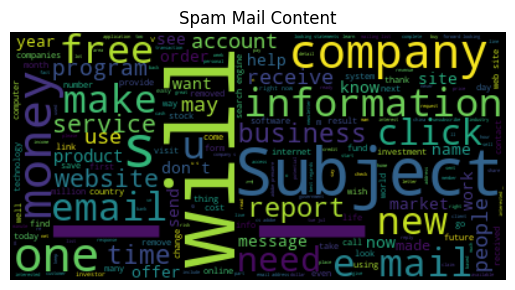

In [11]:
from wordcloud import WordCloud
text = " ".join(x for x in df[df['Label']=='Spam']['Content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Spam Mail Content')
plt.show()

##### Not Spam Mails

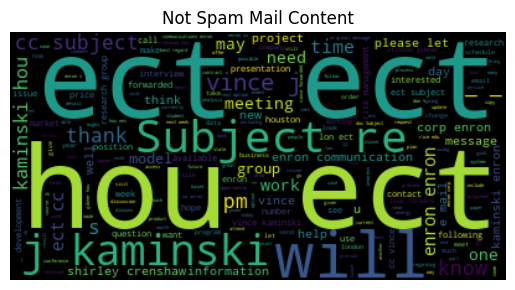

In [12]:
from wordcloud import WordCloud
text = " ".join(x for x in df[df['Label']=='Not Spam']['Content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Not Spam Mail Content')
plt.show()

#### Analyse Counts

In [13]:
df['Characters'] = [len(x) for x in df['Content']]
df['Words'] = [len(x.split(" ")) for x in df['Content']]
df[['Characters','Words']].describe()

,Characters,Words
count,5695.000000,5695.000000
mean,1558.067076,358.137313
std,2047.078711,452.047939
min,13.000000,3.000000
25%,508.500000,112.500000
50%,979.000000,232.000000
75%,1893.000000,439.000000
max,43952.000000,8984.000000


##### Character Distribution

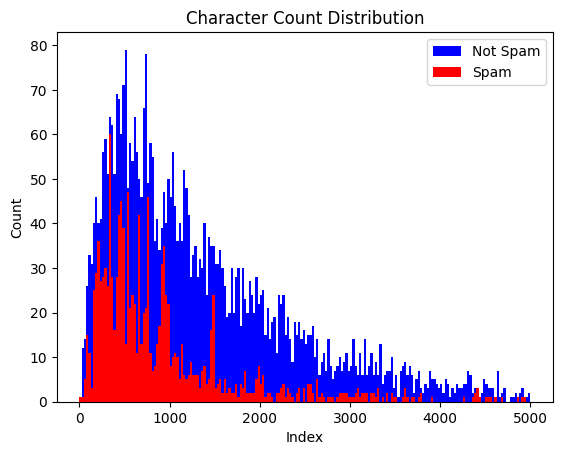

In [14]:
plt.hist(df[df['Label']=='Not Spam']['Characters'],bins=200,range=(0,5000),color='blue',label='Not Spam')
plt.hist(df[df['Label']=='Spam']['Characters'],bins=200,range=(0,5000),color='red',label='Spam')
plt.legend(loc="best")
plt.title("Character Count Distribution")
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

##### Word Distribution

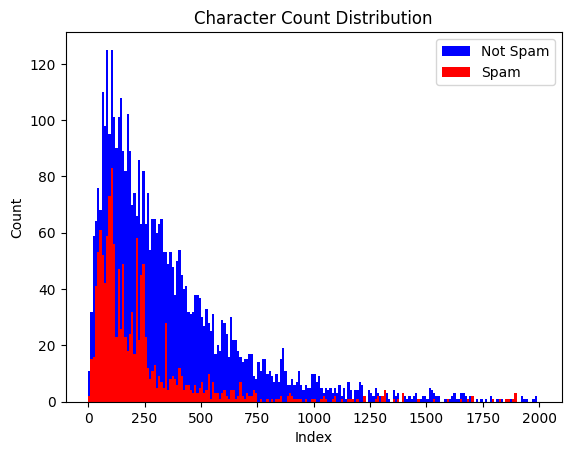

In [15]:
plt.hist(df[df['Label']=='Not Spam']['Words'],bins=200,range=(0,2000),color='blue',label='Not Spam')
plt.hist(df[df['Label']=='Spam']['Words'],bins=200,range=(0,2000),color='red',label='Spam')
plt.legend(loc="best")
plt.title("Character Count Distribution")
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

#### Pairplots

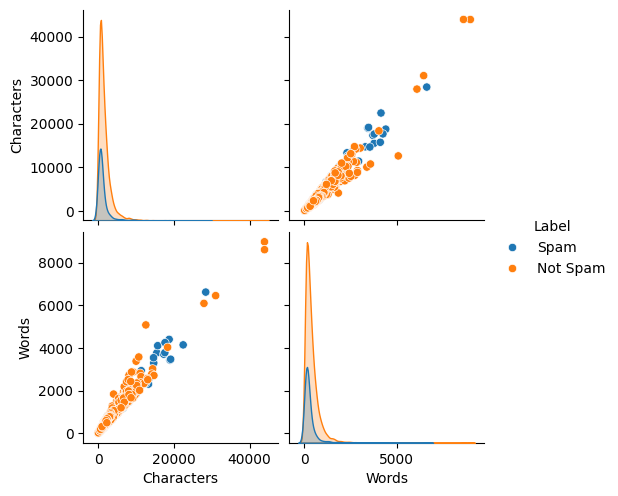

In [16]:
sb.pairplot(df,hue='Label')
plt.show()

#### Heatmap

C:\Users\rishabjj\AppData\Local\Temp\ipykernel_19284\3573615709.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Spam','Not Spam'],value=[1,0],inplace=True)


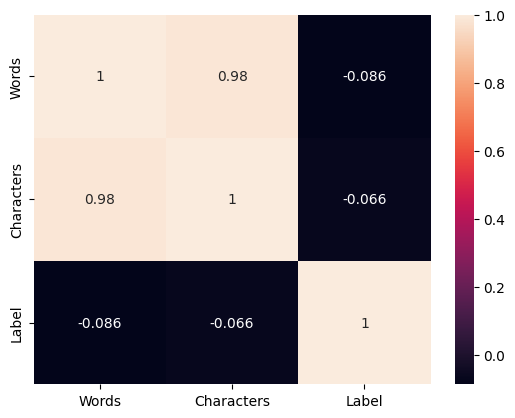

In [17]:
df.replace(to_replace=['Spam','Not Spam'],value=[1,0],inplace=True)
sb.heatmap(df[['Words','Characters','Label']].corr(),annot=True)
df.replace(to_replace=[1,0],value=['Spam','Not Spam'],inplace=True)

### Text Preprocessing

#### Remove Subject and Replied Notations

In [18]:
df['Content'] = [str.replace('Subject: ','') for str in df['Content']]
df['Content'] = [str.replace('re : ','') for str in df['Content']]
df.sample(10)

,Content,Label,Characters,Words
4431,material for thu 2 mar wg meeting fyi . - - ...,Not Spam,10208,2241
2611,"co - integration zimin , andrea reed asked f...",Not Spam,618,126
5572,life . . . : ) maybe next time . roman - -...,Not Spam,1755,506
4570,"prof . carmona yannis , i have looked at the...",Not Spam,363,81
1352,rape ! ! . rape sex ! click here you must b...,Spam,408,89
5441,please note that the date for the lst meeting ...,Not Spam,1740,437
5089,powerisk 2001 - your invitation angelika . y...,Not Spam,4315,895
638,"all graphics software available , cheap oem ve...",Spam,979,232
1910,iafe membership a membership renewal form was...,Not Spam,2186,540
1979,mid - project review dates - enron great ! i ...,Not Spam,2212,635


#### Porter Stemming

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_sentence(sentence):
    new=""
    for word in sentence.split(" "):
        new+=stemmer.stem(word.strip(',').strip('!').strip(' '))+" "
    return new

df['Content'] = [stem_sentence(row) for row in df['Content']]

### Model Preparation

#### Test-Train Split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['Content'],df['Label'],test_size=0.3)

#### Vectorization

In [21]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

#### Handling Imbalance in Dataset

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1234)
X_sm, Y_sm = smote.fit_resample(X_train_cv,Y_train)

#### Model Fitting

In [24]:
from sklearn.naive_bayes import MultinomialNB  
model = MultinomialNB()
model.fit(X_sm,Y_sm)

MultinomialNB()

#### Prediction and Accuracy Test

In [25]:
from sklearn.metrics import accuracy_score,f1_score,precision_score
Y_predict = model.predict(X_test_cv)
print(f"Accuracy: {round(accuracy_score(Y_test,Y_predict)*100,3)}")
print(f"Precision: {round(precision_score(Y_test,Y_predict,labels=['Spam','Not Spam'],pos_label='Not Spam')*100,3)}")
print(f"F1 Score: {round(f1_score(Y_test,Y_predict,labels=['Spam','Not Spam'],pos_label='Not Spam')*100,3)}")

Accuracy: 99.122
Precision: 99.457
F1 Score: 99.418


#### Classification Summary


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99      1290
        Spam       0.98      0.98      0.98       419

    accuracy                           0.99      1709
   macro avg       0.99      0.99      0.99      1709
weighted avg       0.99      0.99      0.99      1709



#### Confusion Matrix

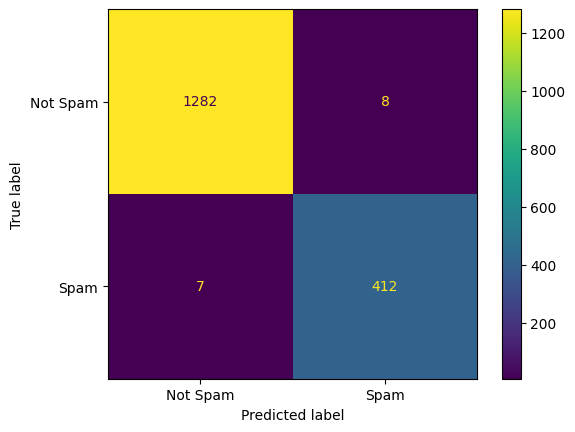

In [27]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

### TF-IDF Vectorizer

In [28]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

smote = SMOTE(random_state=1234)
X_sm, Y_sm = smote.fit_resample(X_train_cv,Y_train)

model = MultinomialNB()
model.fit(X_sm,Y_sm)

Y_predict = model.predict(X_test_cv)
print(f"Accuracy: {round(accuracy_score(Y_test,Y_predict)*100,3)}")
print(f"Precision: {round(precision_score(Y_test,Y_predict,labels=['Spam','Not Spam'],pos_label='Not Spam')*100,3)}")
print(f"F1 Score: {round(f1_score(Y_test,Y_predict,labels=['Spam','Not Spam'],pos_label='Not Spam')*100,3)}")

Accuracy: 98.83
Precision: 99.455
F1 Score: 99.223


#### Classification Report

In [29]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99      1290
        Spam       0.97      0.98      0.98       419

    accuracy                           0.99      1709
   macro avg       0.98      0.99      0.98      1709
weighted avg       0.99      0.99      0.99      1709



###### This proves that in this case using TF-IDF Vectorizer has been able to slightly improve the accuracy and individual f1-scores

### Model Saving and Storing

#### Model Pickling

In [30]:
import pickle
fm = open('pickles/model_pickle','wb')
pickle.dump(model,fm)

fv = open('pickles/vectorizer_pickle','wb')
pickle.dump(vectorizer,fv)